   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


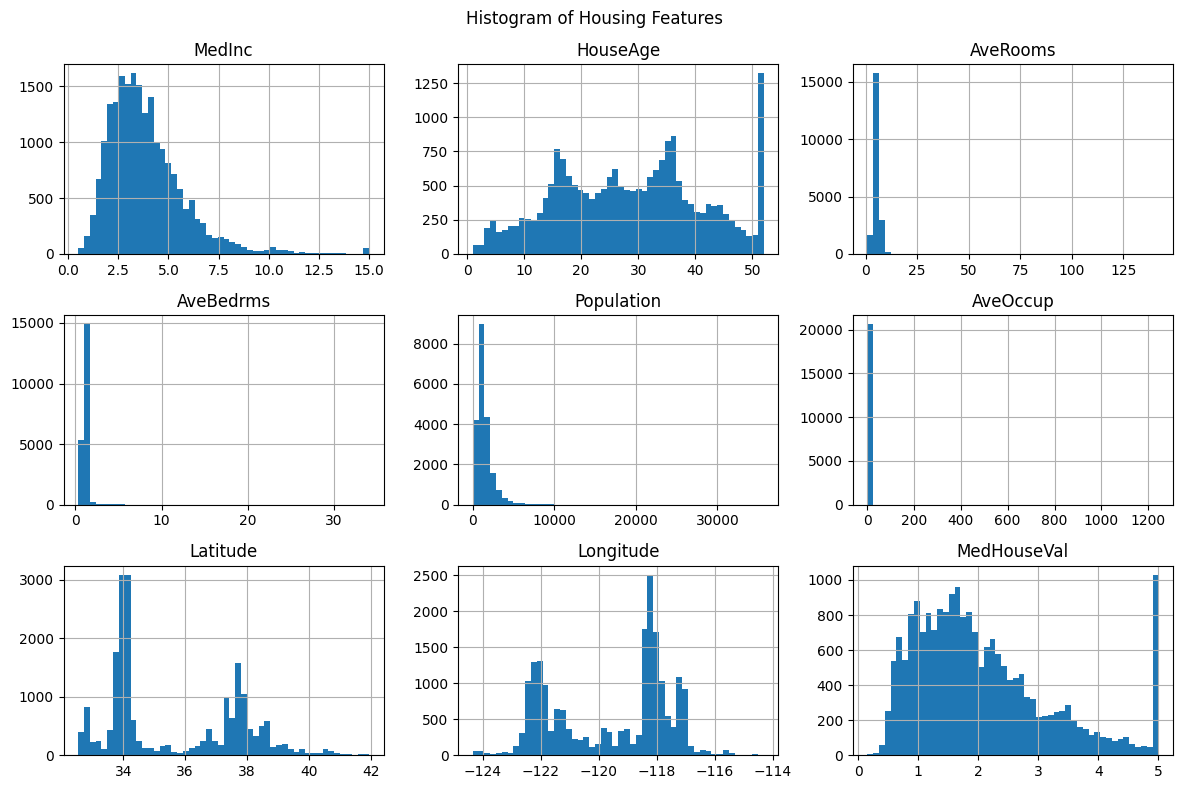

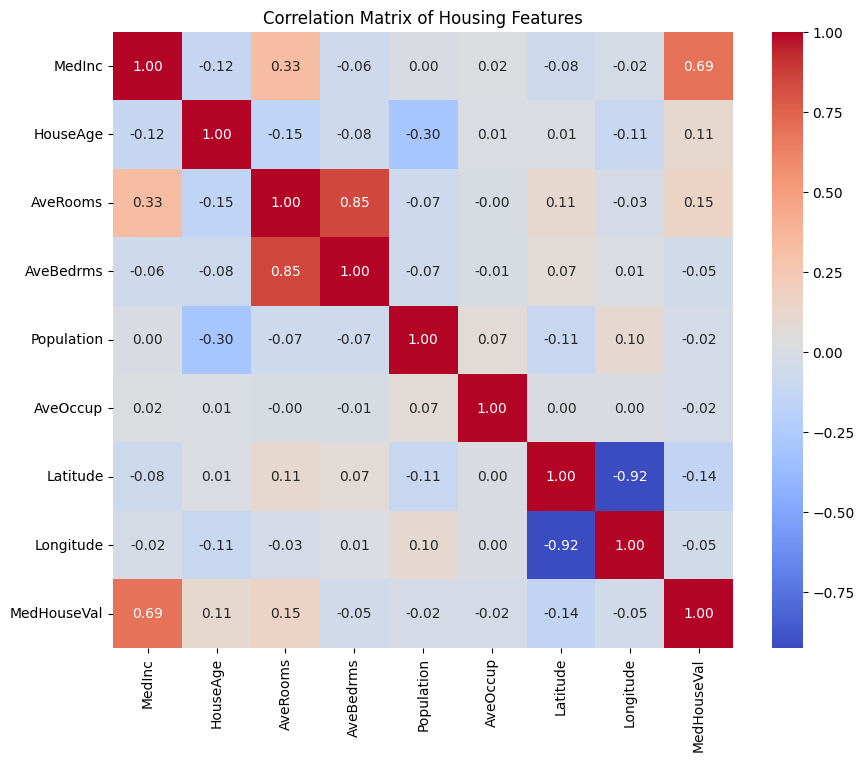

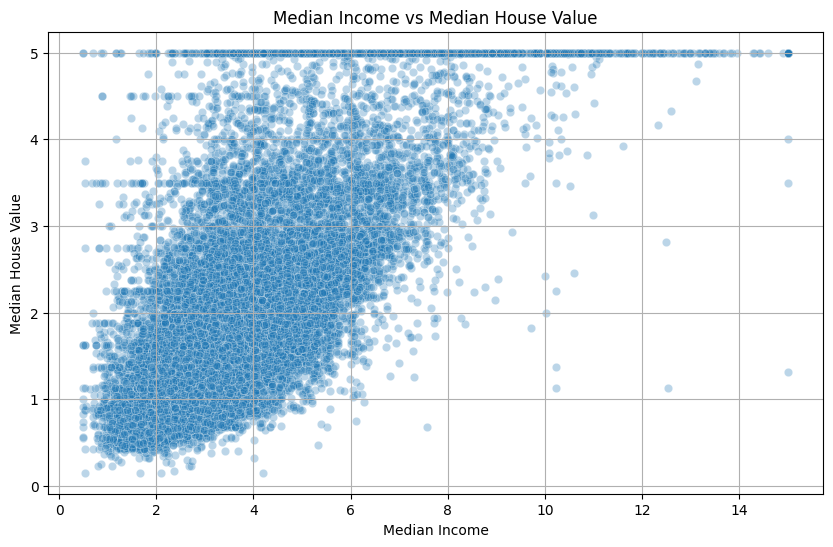

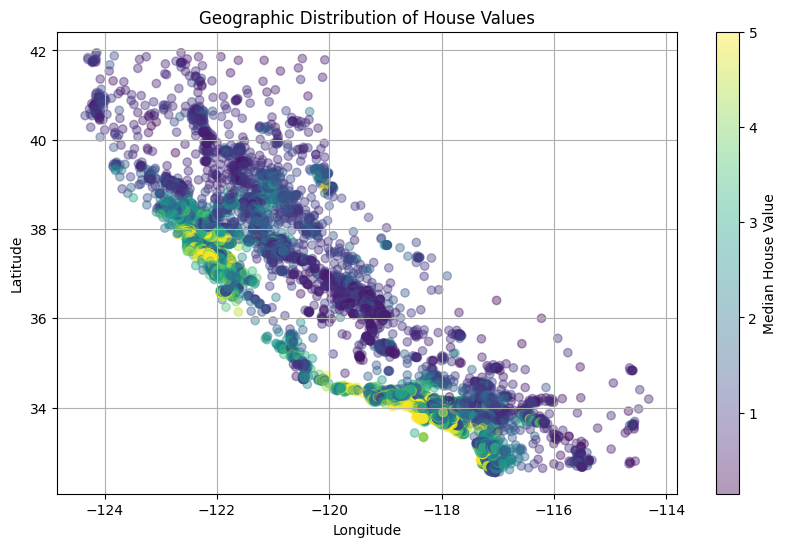

Root Mean Squared Error: 0.5051432839771741


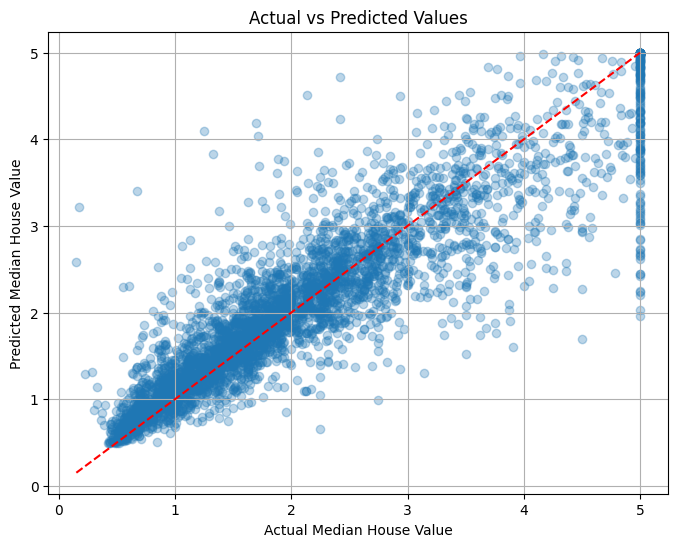

Best Parameters: {'max_features': 4, 'n_estimators': 100}
Best Estimator RMSE: 0.5048787657614228


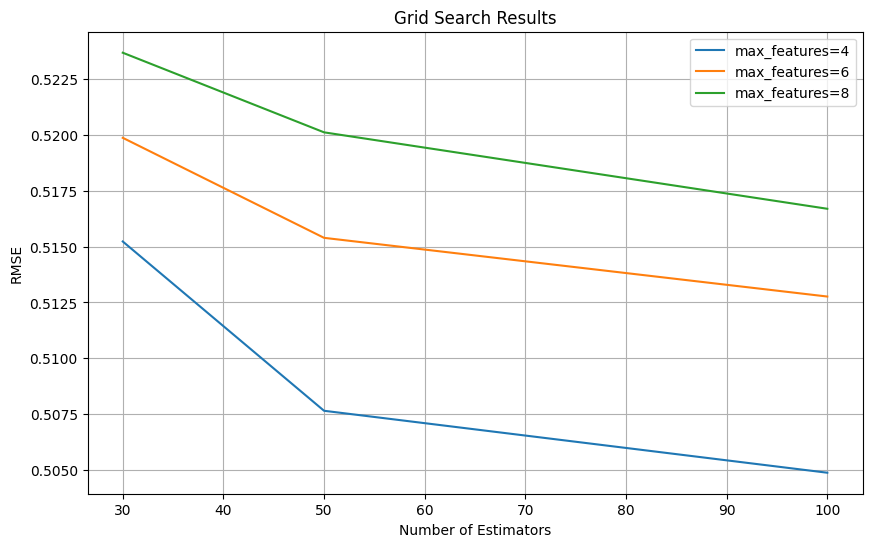

In [1]:
# ML Internship - Manual 01 | ARCH Technologies
# Category B: Task 02
# Chapters 1 and 2 Implementation from Hands-On Machine Learning

# --------------------------------------------
# Chapter 1: ML Landscape - No code needed, theory only
# --------------------------------------------
# Task:
# - Read the chapter
# - Take notes on: ML types, algorithms, challenges, data problems, hyperparameters, etc.
# - Solve exercises and write answers in MS Word or notebook

# --------------------------------------------
# Chapter 2: End-to-End Machine Learning Project
# --------------------------------------------

# Step 1: Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Load California Housing Dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(as_frame=True)
housing_df = housing.frame.copy()

# Step 2: Data Exploration
print(housing_df.head())
housing_df.hist(bins=50, figsize=(12, 8))
plt.suptitle("Histogram of Housing Features")
plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(housing_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Housing Features")
plt.show()

# Median Income vs Median House Value
plt.figure(figsize=(10, 6))
sns.scatterplot(data=housing_df, x="MedInc", y="MedHouseVal", alpha=0.3)
plt.title("Median Income vs Median House Value")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.grid(True)
plt.show()

# Longitude vs Latitude with House Value Coloring
plt.figure(figsize=(10, 6))
plt.scatter(housing_df["Longitude"], housing_df["Latitude"], alpha=0.4,
            c=housing_df["MedHouseVal"], cmap="viridis")
plt.colorbar(label="Median House Value")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographic Distribution of House Values")
plt.grid(True)
plt.show()

# Step 3: Train-Test Split
train_set, test_set = train_test_split(housing_df, test_size=0.2, random_state=42)

# Step 4: Data Preprocessing Pipeline
features = train_set.drop("MedHouseVal", axis=1)
labels = train_set["MedHouseVal"]

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('scaler', StandardScaler()),
])

features_prepared = pipeline.fit_transform(features)

# Step 5: Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(features_prepared, labels)

# Step 6: Evaluation on Test Set
test_features = test_set.drop("MedHouseVal", axis=1)
test_labels = test_set["MedHouseVal"]
test_prepared = pipeline.transform(test_features)

predictions = model.predict(test_prepared)
mse = mean_squared_error(test_labels, predictions)
rmse = np.sqrt(mse)

print("Root Mean Squared Error:", rmse)

# Actual vs Predicted Plot
plt.figure(figsize=(8, 6))
plt.scatter(test_labels, predictions, alpha=0.3)
plt.plot([test_labels.min(), test_labels.max()], [test_labels.min(), test_labels.max()], 'r--')
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted Values")
plt.grid(True)
plt.show()

# Step 7: GridSearchCV for Hyperparameter Tuning
param_grid = {
    'n_estimators': [30, 50, 100],
    'max_features': [4, 6, 8]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(features_prepared, labels)

print("Best Parameters:", grid_search.best_params_)
print("Best Estimator RMSE:", np.sqrt(-grid_search.best_score_))

# Plot Grid Search Results
results = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(10, 6))
for max_feat in param_grid['max_features']:
    subset = results[results['param_max_features'] == max_feat]
    plt.plot(subset['param_n_estimators'], np.sqrt(-subset['mean_test_score']), label=f"max_features={max_feat}")
plt.xlabel("Number of Estimators")
plt.ylabel("RMSE")
plt.title("Grid Search Results")
plt.legend()
plt.grid(True)
plt.show()